# Regression Task Project1
1. Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results.
2. Then use cross-validation to find average training and testing score.
3. Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels (rbf, poly, linear).
4. Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set.

## In this step we have taken below steps:-
> 1. Importing the libraries
> 2. Exploratory Data Analysis
> 3. Preprocessing
> 4. Applying the ML Models for regression first with GridSearch to find best parameter, Second with best parameter, third with cross validation to check training and test score

# 1. Importing the libraries

In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, MinMaxScaler
from sklearn.svm import SVC
from termcolor import colored
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import seaborn as sns

In [317]:
data = pd.read_csv("ToyotaCorolla.csv")

In [318]:
print("train data size is", data.shape)

train data size is (1436, 37)


In [319]:
data.head(3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,NaN,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,NaN,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0


# 2. EDA
0) Interpret variables one by one and establish hypotheses about the relationship with dependent variables

1) Search the acquired data and check and classify the data type for each variable (Numerical or Text, Ordered or Unordered, Continuous or Discrete / Categorical ... etc)

2) Pre-processing after checking outliers such as no NaN value and no empty data

3) Exploring the relationship between variables (using Scatter Plot, Box Plot, Heat Map, etc.)

In [320]:
data.drop(['Id','Model'], axis=1, inplace=True)

In [321]:
data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,Diesel,NaN,1,0,2000.0,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,Diesel,NaN,1,0,2000.0,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,Diesel,90.0,1,0,2000.0,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,Diesel,90.0,0,0,2000.0,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,Diesel,90.0,0,0,2000.0,...,1,1,1,0,1,0,1,0,0,0


In [322]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 35 columns):
Price               1436 non-null int64
Age_08_04           1436 non-null int64
Mfg_Month           1436 non-null int64
Mfg_Year            1436 non-null int64
KM                  1436 non-null int64
Fuel_Type           1436 non-null object
HP                  1366 non-null float64
Met_Color           1436 non-null int64
Automatic           1436 non-null int64
cc                  1385 non-null float64
Doors               1424 non-null float64
Cylinders           1398 non-null float64
Gears               1418 non-null float64
Quarterly_Tax       1436 non-null int64
Weight              1431 non-null float64
Mfr_Guarantee       1436 non-null int64
BOVAG_Guarantee     1436 non-null int64
Guarantee_Period    1436 non-null int64
ABS                 1436 non-null int64
Airbag_1            1436 non-null int64
Airbag_2            1436 non-null int64
Airco               1436 non-null int64


In [323]:
# there are missing values in the dataset too
data.isnull().sum()

Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                  70
Met_Color            0
Automatic            0
cc                  51
Doors               12
Cylinders           38
Gears               18
Quarterly_Tax        0
Weight               5
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Tow_Bar              0
dtype: int64

### 1. Fuel_Type

In [324]:
# we can create dummy variable for Fuel_Type
data['Fuel_Type'].value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64

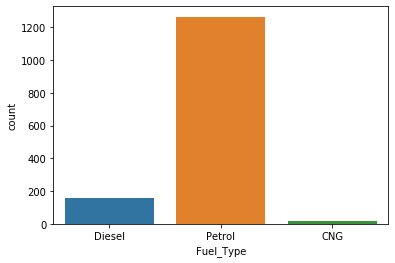

In [325]:
sns.countplot(data['Fuel_Type'])

### 2. Price

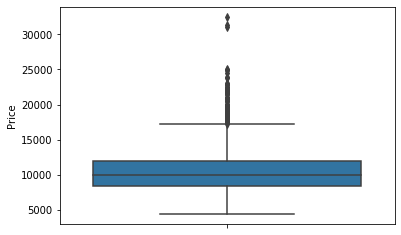

In [326]:
sns.boxplot(data['Price'],orient='v')

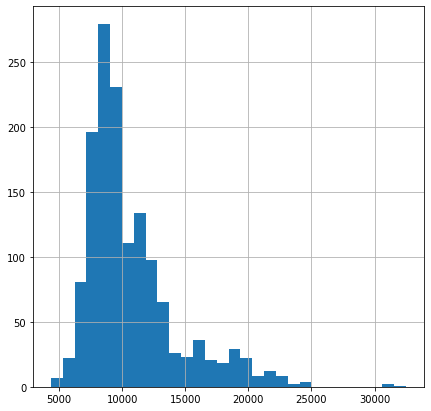

In [327]:
# data is left skewed
data['Price'].hist(bins=30, figsize=(7,7))
plt.show()

In [328]:
data['Price'].mean()

10730.824512534818

In [329]:
data[data['Price']>17500]['Price'].count()

105

### 3. Age_08_04

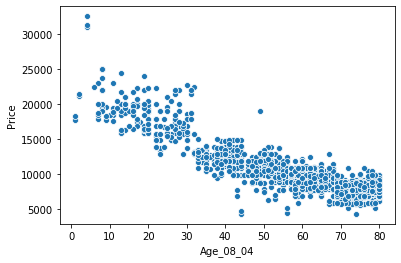

In [330]:
# as the age increases price of the car decreases 
sns.scatterplot(data['Age_08_04'], data['Price'])

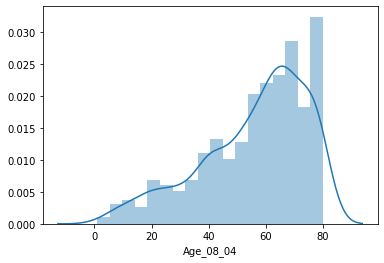

In [331]:
sns.distplot(data['Age_08_04'])

### 4.Mfg_Month

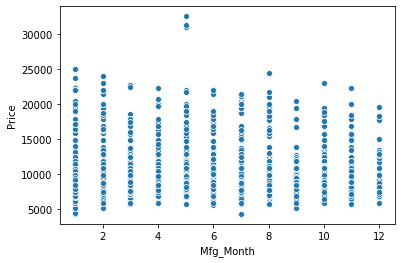

In [332]:
#there is no such relationship between Mfg_Month and Price
sns.scatterplot(data['Mfg_Month'], data['Price'])

In [333]:
data.groupby("Mfg_Year").count()['Age_08_04']

Mfg_Year
1998    392
1999    441
2000    225
2001    192
2002     87
2003     75
2004     24
Name: Age_08_04, dtype: int64

In [334]:
#There are 17 CNG vehicles, 106 Diesel, and 904 Petroleum vehicles, overwhelmingly.
data.groupby(['Mfg_Year', 'Fuel_Type']).count()['Age_08_04']

Mfg_Year  Fuel_Type
1998      CNG            3
          Diesel        36
          Petrol       353
1999      CNG            6
          Diesel        37
          Petrol       398
2000      CNG            3
          Diesel        28
          Petrol       194
2001      CNG            5
          Diesel        21
          Petrol       166
2002      Diesel        16
          Petrol        71
2003      Diesel         9
          Petrol        66
2004      Diesel         8
          Petrol        16
Name: Age_08_04, dtype: int64

### 5. Mfg_Year

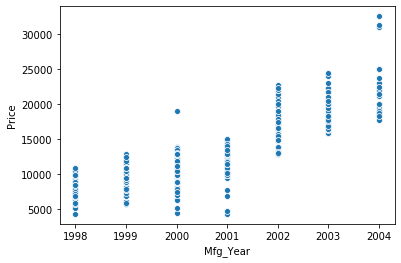

In [335]:
# as the age increases price of the car decreases 
sns.scatterplot(data['Mfg_Year'], data['Price'])

In [336]:
data.groupby(['Mfg_Year', 'Fuel_Type', 'cc','HP']).count()

Price  Age_08_04  Mfg_Month   KM  Met_Color  \
Mfg_Year Fuel_Type cc     HP                                                   
1998     CNG       1600.0 110.0      1          1          1    1          1   
         Diesel    2000.0 72.0      23         23         23   23         23   
                          73.0       1          1          1    1          1   
                          90.0       2          2          2    2          2   
         Petrol    1300.0 86.0     103        103        103  103        103   
...                                ...        ...        ...  ...        ...   
2004     Diesel    2000.0 90.0       1          1          1    1          1   
                          116.0      4          4          4    4          4   
         Petrol    1400.0 97.0       4          4          4    4          4   
                          98.0       1          1          1    1          1   
                   1600.0 110.0     11         11         11   11         11   

                                 Automatic  Doors  Cylinders  Gears  \
Mfg_Year Fuel_Type cc     HP                                          
1998     CNG       1600.0 110.0          1      1          1      1   
         Diesel    2000.0 72.0          23     23         22     21   
                          73.0           1      1          1      1   
                          90.0           2      2          2      2   
         Petrol    1300.0 86.0         103    103        100    103   
...                                    ...    ...        ...    ...   
2004     Diesel    2000.0 90.0           1      1          1      1   
                          116.0          4      4          4      4   
         Petrol    1400.0 97.0           4      4          4      4   
                          98.0           1      1          1      1   
                   1600.0 110.0         11     11         11     11   

                                 Quarterly_Tax  ...  Central_Lock  \
Mfg_Year Fuel_Type cc     HP                    ...                 
1998     CNG       1600.0 110.0              1  ...             1   
         Diesel    2000.0 72.0              23  ...            23   
                          73.0               1  ...             1   
                          90.0               2  ...             2   
         Petrol    1300.0 86.0             103  ...           103   
...                                        ...  ...           ...   
2004     Diesel    2000.0 90.0               1  ...             1   
                          116.0              4  ...             4   
         Petrol    1400.0 97.0               4  ...             4   
                          98.0               1  ...             1   
                   1600.0 110.0             11  ...            11   

                                 Powered_Windows  Power_Steering  Radio  \
Mfg_Year Fuel_Type cc     HP                                              
1998     CNG       1600.0 110.0                1               1      1   
         Diesel    2000.0 72.0                23              23     23   
                          73.0                 1               1      1   
                          90.0                 2               2      2   
         Petrol    1300.0 86.0               103             103    103   
...                                          ...             ...    ...   
2004     Diesel    2000.0 90.0                 1               1      1   
                          116.0                4               4      4   
         Petrol    1400.0 97.0                 4               4      4   
                          98.0                 1               1      1   
                   1600.0 110.0               11              11     11   

                                 Mistlamps  Sport_Model  Backseat_Divider  \
Mfg_Year Fuel_Type cc     HP                                                
1998     CNG       1600.0 110.0         

# 2. Preprocessing

### 6. cc

In [337]:
data['cc'].value_counts()

1600.0     826
1300.0     242
1400.0     164
2000.0     108
1900.0      17
1800.0      13
1587.0       4
1598.0       3
1995.0       2
1332.0       2
1398.0       2
16000.0      1
1975.0       1
Name: cc, dtype: int64

In [338]:
# Remove outliers from 'CC' data
data["cc"].replace([16000], 1600, inplace=True)

#remove the Null Value from cc
data["cc"].fillna( method ='ffill', inplace = True)

# CC data rounded to tens digit (** 00)
new_cc =[]
for item in list(data['cc']):
    if item % 100 == 0:
        new_cc.append(item)
    
    elif item % 100 > 50:
        revised_item = item + 100 - (item % 100)
        new_cc.append(revised_item)
    
    elif 0 < item % 100 < 50:
        revised_item_2 = item - (item % 100)
        new_cc.append(revised_item_2)

df["cc"] = pd.DataFrame(new_cc)



### 7. HP

In [339]:
#remove the Null Value from cc
data["HP"].fillna(data["HP"].median(), inplace = True)

new_hp_1 = []
for item in list(data['HP']):
    if 60 < item < 75:
        item = 70
        new_hp_1.append(item)
    elif 80 < item < 91:
        item = 90
        new_hp_1.append(item)
    elif 95 < item < 105:
        item = 100
        new_hp_1.append(item)
    elif 105 < item < 120:
        item = 110
        new_hp_1.append(item)
    elif item > 190:
        item = 190
        new_hp_1.append(item)
        
data["HP"] = pd.DataFrame(new_hp_1)

data["HP"].tail(n=10)



1426    110
1427     90
1428     90
1429     90
1430     90
1431     90
1432     90
1433     90
1434     90
1435    110
Name: HP, dtype: int64

### 7.Doors

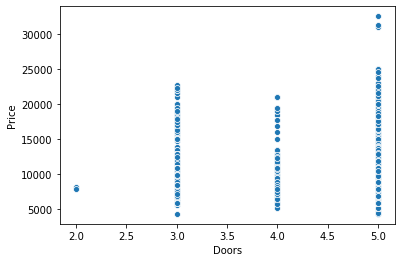

In [340]:
sns.scatterplot(data['Doors'], data['Price'])

In [341]:
# Real(Ordered, Numerical) data
real_var = ['Age_08_04', 'KM', "Quarterly_Tax", 'Weight', 'Guarantee_Period']

# category data 
cat_var = ["Mfg_Year", "HP", "CC", "Fuel_Type", "Doors", 'Gears', "Met_Color", "Automatic", "Mfr_Guarantee",
           "BOVAG_Guarantee", "ABS", "Airbag_1", "Airbag_2", "Airco",
          "Automatic_airco", "Boardcomputer", "CD_Player", "Central_Lock",
          "Powered_Windows", "Power_Steering", "Radio", "Mistlamps",
          "Sport_Model", "Backseat_Divider", "Metallic_Rim", "Radio_cassette",
          "Parking_Assistant","Tow_Bar"]

/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


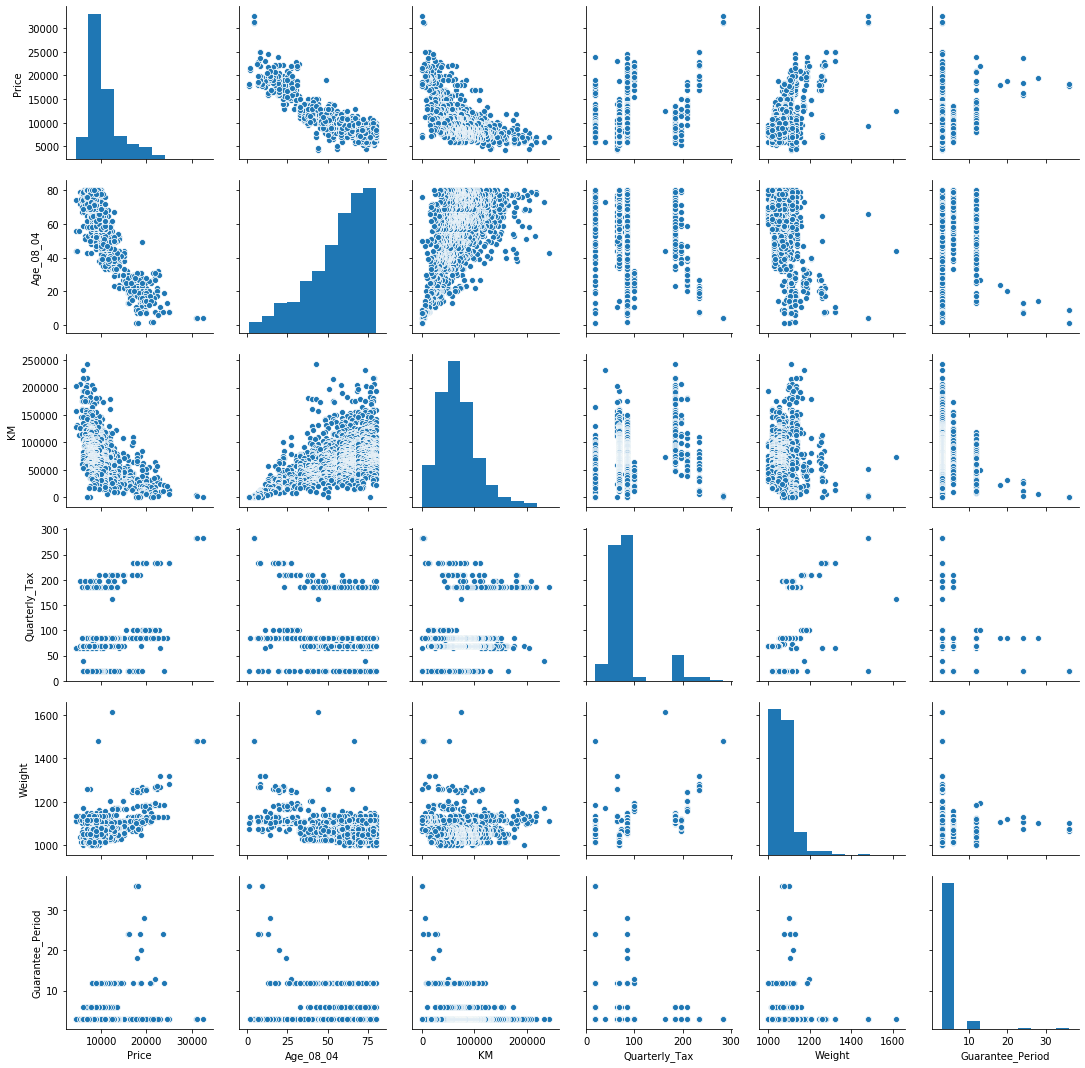

In [342]:
#As the dependent variable Price is also continuous numerical data, the relationship with other continuous variables 
#is checked and analyzed through pairplot
real_var_and_price = ['Price','Age_08_04', 'KM', "Quarterly_Tax", 'Weight', 'Guarantee_Period']
sns.pairplot(data[real_var_and_price])

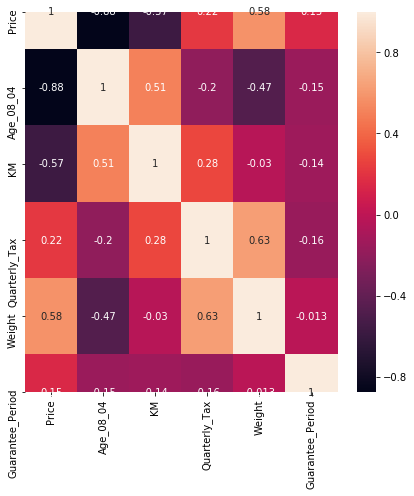

In [343]:
#Correlation coefficient of 0.5 or more, ** Age_08_04, KM, Weight were selected as relatively important variables
corr_table = pd.concat([data["Price"], data[real_var]], axis=1)
corr_mat = corr_table.corr()

# heatmap
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corr_mat, annot=True)

In [344]:
data.drop(["Quarterly_Tax", 'Guarantee_Period'], axis=1, inplace=True)

In [345]:
data.isna().sum()

Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Automatic            0
cc                   0
Doors               12
Cylinders           38
Gears               18
Weight               5
Mfr_Guarantee        0
BOVAG_Guarantee      0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Tow_Bar              0
dtype: int64

In [346]:
data["Doors"].fillna(data["Doors"].median(), inplace = True)

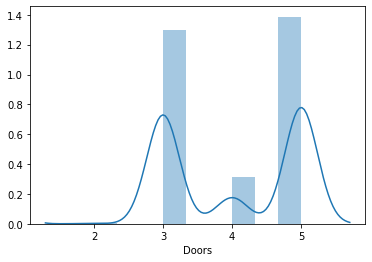

In [347]:
sns.distplot(data['Doors'])

In [348]:
new_doors = []
for item in data["Doors"]:
    if item == 2 or item == 4 :
        item = 0 #Sedan
        new_doors.append(item)
    else:
        item = 1 #Wagon
        new_doors.append(item)

new_doors_df = pd.DataFrame(new_doors)
data['New_Doors'] = new_doors_df

In [349]:
data.drop(["Doors"], axis=1, inplace=True)

### Treat missing values

In [350]:
data["Cylinders"].fillna(data["Cylinders"].median(), inplace = True)

In [351]:
data["Gears"].fillna(data["Gears"].median(), inplace = True)

In [352]:
data["Weight"].fillna(data["Weight"].mean(), inplace = True)

In [353]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 33 columns):
Price               1436 non-null int64
Age_08_04           1436 non-null int64
Mfg_Month           1436 non-null int64
Mfg_Year            1436 non-null int64
KM                  1436 non-null int64
Fuel_Type           1436 non-null object
HP                  1436 non-null int64
Met_Color           1436 non-null int64
Automatic           1436 non-null int64
cc                  1436 non-null float64
Cylinders           1436 non-null float64
Gears               1436 non-null float64
Weight              1436 non-null float64
Mfr_Guarantee       1436 non-null int64
BOVAG_Guarantee     1436 non-null int64
ABS                 1436 non-null int64
Airbag_1            1436 non-null int64
Airbag_2            1436 non-null int64
Airco               1436 non-null int64
Automatic_airco     1436 non-null int64
Boardcomputer       1436 non-null int64
CD_Player           1436 non-null int64
Cent

In [354]:
data = pd.get_dummies(data, drop_first=True)

# 3. Scaling the data

In [355]:
x = data.iloc[:,1:]
y = data['Price']

In [356]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 0)

In [357]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# 4. Applying ML Models

## 1. Linear Regression

In [572]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_sc, y_train)
pred = lm.predict(X_test_sc)

In [573]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': (pred)})
df

,Actual,Predicted
651,7950,8722.633719
411,10950,10749.671535
342,14950,13566.695022
1298,7500,7847.249975
483,9900,10739.535495
...,...,...
1029,10450,11010.450969
520,9400,9755.968564
996,9950,10721.024332
333,11750,12370.316272


In [586]:
from sklearn.metrics import r2_score
lin_Rsq = r2_score(y_test, pred)
print(lin_Rsq)

0.851350409228317


In [575]:
np.sqrt(((y_test-pred)**2).mean())

1359.9783865078286

In [576]:
print('Linear Regression')
lreg_score_train = round((lm.score(X_train_sc, y_train)*100),2)
print("\nTrain score -->",lreg_score_train)
lreg_score_test = round((lm.score(X_test_sc, y_test)*100),2)
print("Test score  -->",lreg_score_test)
y_pred_test = lm.predict(X_test_sc)
rmse_lreg = np.sqrt(mean_squared_error(pred, y_test)**2)
print("RMSE LREG   -->",rmse_lreg)

Linear Regression

Train score --> 91.02
Test score  --> 85.14
RMSE LREG   --> 1849541.2117684362


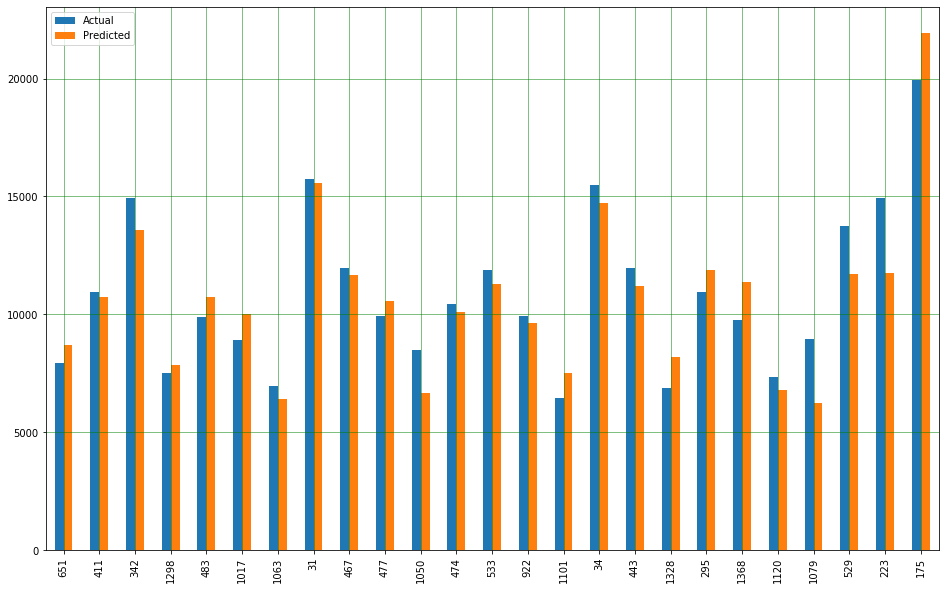

In [361]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# 2. Ridge Regression

### Ridge Regression with Grid Search

In [558]:
#Taking range of Alpha values with 5 fold cross validation to find the best parameter
ridge_params = {'alpha':[0.0001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.5, 1, 5, 10, 15]}
n = 10000
grid_search_ridge = GridSearchCV(linear_model.Ridge(random_state=0), ridge_params, cv=5, n_jobs=-1)
grid_search_ridge.fit(X_train_sc, y_train)

print("\nBest tuning parameter from grid search -->" ,grid_search_ridge.best_params_)


Best tuning parameter from grid search --> {'alpha': 15}


### Ridge Regression with best value of Alpha 

In [590]:
ridge = linear_model.Ridge(grid_search_ridge.best_params_['alpha'])
ridge.fit(X_train_sc,y_train)

ridge_score_train = round((ridge.score(X_train_sc,y_train)*100),2)
print("\nTrain score -->",round((ridge.score(X_train_sc,y_train)*100),2) )

ridge_score_test = round((ridge.score(X_test_sc,y_test)*100),2)
print("Test score  -->",round((ridge.score(X_test_sc,y_test)*100),2) )
y_pred_test = ridge.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE RIDGE  -->",rmse_ridge)




Train score --> 91.01
Test score  --> 85.12
RMSE RIDGE  --> 2288073290574368.5


### cross-validation to find average training and testing score

In [498]:
#Cross validation for mean score k = 10
for alpha in [0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15]:
    train_scores = []
    test_scores = []
    train_scores.append(cross_val_score(linear_model.Ridge(alpha),X_train_sc,y_train,cv=10))
    test_scores.append(cross_val_score(linear_model.Ridge(alpha),X_test_sc,y_test,cv=10))

print("\nMean Train score -->",np.mean(train_scores))
print("Mean Test score  -->",np.mean(test_scores))


Mean Train score --> 0.8915998821106346
Mean Test score  --> 0.8145866903273904


In [ ]:
%matplotlib inline
train_score_array = []
test_score_array = []

x_axis = np.array([0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15])
plt.plot(x_axis, np.array(train_scores).reshape(-1,1), c = 'g', label = 'Train Score')
plt.plot(x_axis, np.array(test_scores).reshape(-1,1), c = 'b', label = 'Test Score')
plt.legend()
plt.ylabel('MSE')
plt.xscale('log')
plt.legend(loc = 4)
plt.xlabel(r'$\alpha$')

# 3. Lasso Regression

### Lasso Regression with Grid Search

In [409]:
#Taking range of Alpha values with 5 fold cross validation to find the best parameter
lasso_params = {'alpha':[0.0001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.5, 1, 5, 7, 10]}

grid_search_lasso = GridSearchCV(linear_model.Lasso(random_state=0), lasso_params, cv=10, n_jobs=-1)
grid_search_lasso.fit(X_train_sc, y_train)

print("\nBest tuning parameter from lasso search -->" ,grid_search_lasso.best_params_)


Best tuning parameter from lasso search --> {'alpha': 10}


### Lasso Regression with best value of Alpha 

In [543]:
lasso = linear_model.Lasso(grid_search_lasso.best_params_['alpha'])
lasso.fit(X_train_sc,y_train)

lasso_score_train = round((lasso.score(X_train_sc,y_train)*100),2)
print("\nTrain score -->",round((lasso.score(X_train_sc,y_train)*100),2) )

lasso_score_test = round((lasso.score(X_test_sc,y_test)*100),2)
print("Test score  -->",round((lasso.score(X_test_sc,y_test)*100),2) )
y_pred_test = lasso.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE LASSO  -->",rmse_lasso)



Train score --> 90.95
Test score  --> 85.07
RMSE LASSO  --> 2216707633565349.2


###  Lasso cross-validation to find average training and testing score

In [496]:
#Cross validation for mean score k = 10
for alpha in [0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15]:
    train_scores = []
    test_scores = []
    train_scores.append(cross_val_score(linear_model.Lasso(alpha),X_train_sc,y_train,cv=10))
    test_scores.append(cross_val_score(linear_model.Lasso(alpha),X_test_sc,y_test,cv=10))

print("\nMean Train score -->",np.mean(train_scores)*100)
print("Mean Test score  -->",np.mean(test_scores)*100)

/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13000739.052794218, tolerance: 1375559.964887125
  positive)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98252986.78006506, tolerance: 1373841.2379161667
  positive)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12282399.999998331, tolerance: 1373841.2379161667
  positive)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWar


Mean Train score --> 89.18333114428607
Mean Test score  --> 81.31567784629976


Text(0.5, 0, '$\\alpha$')

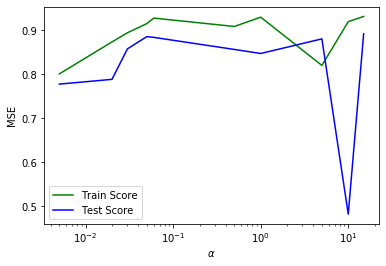

In [502]:
%matplotlib inline
train_score_array = []
test_score_array = []

x_axis = np.array([0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15])
plt.plot(x_axis, np.array(train_scores).reshape(-1,1), c = 'g', label = 'Train Score')
plt.plot(x_axis, np.array(test_scores).reshape(-1,1), c = 'b', label = 'Test Score')
plt.legend()
plt.ylabel('MSE')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

# 4. SVM

### SVR Regression with Grid Search

In [522]:
gsc = GridSearchCV(
        estimator=SVR(),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5],
            'kernel':('linear', 'rbf','poly')
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [523]:
gsc.fit(X_train_sc, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5],
                         'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [524]:
print("Best parameters: {}".format(gsc.best_params_))
print("\nTrain score   -->" , gsc.score(X_train_sc,y_train))
print("Test score    -->", gsc.score(X_test_sc,y_test))
y_pred_test = gsc.predict(X_test_sc)
rmse_svm = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE SVM Reg  -->",rmse_svm)

Best parameters: {'C': 100, 'gamma': 0.0001, 'kernel': 'linear'}

Train score   --> -1269534.8639879604
Test score    --> -1959587.1254378888
RMSE SVM Reg  --> 1959587.1254378888


### SVR Regression with best parameter

In [546]:
clf_SVR = SVR(C=100, kernel='linear', gamma = .0001)
clf_SVR.fit(X_train_sc, y_train)
clf_pred = clf_SVR.predict(X_test_sc)

SVR_reg_train_score = round((clf_SVR.score(X_train_sc, y_train)*100),2)
SVR_reg_test_score= round((clf_SVR.score(X_test_sc, y_test)*100),2)
print("\nMean Train score -->",SVR_reg_train_score)
print("Mean Test score  -->",SVR_reg_test_score)

rmse_SVR = np.sqrt(mean_squared_error(clf_pred, y_test)**2)
print("RMSE SVR Regressor  -->",rmse_SVR)


Mean Train score --> 90.47
Mean Test score  --> 84.25
RMSE SVR Regressor  --> 1959587.1254378888


### SVR cross-validation to find average training and testing score

In [528]:
train_scores = []
test_scores = []
train_scores.append(cross_val_score(clf_SVR,X_train_sc,y_train,cv=10))
test_scores.append(cross_val_score(clf_SVR,X_test_sc,y_test,cv=10))

print("\nMean Train score -->",np.mean(train_scores)*100)
print("Mean Test score  -->",np.mean(test_scores)*100)


Mean Train score --> 88.97903625096377
Mean Test score  --> 80.74416581793633


# 5. KNN

### KNN Regression with Grid Search

In [484]:
k_range = list(range(1,10))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range)

#print (param_grid)
knn = KNeighborsRegressor()

grid = GridSearchCV(knn, param_grid, cv = 10)
grid.fit(X_train_sc,y_train)
print (grid.best_params_)
print (grid.best_estimator_)

{'n_neighbors': 9}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')


### KNN Regression with best parameter

In [549]:
knn_reg = KNeighborsRegressor(grid.best_params_['n_neighbors'])
knn_reg.fit(X_train_sc, y_train)

knn_reg_train_score = round((knn_reg.score(X_train_sc, y_train)*100),2)
print("\nTrain score -->",knn_reg_train_score)
knn_reg_test_score= round((knn_reg.score(X_test_sc, y_test)*100),2)
print("Test score -->",knn_reg_test_score)


y_pred_test = knn_reg.predict(X_test_sc)
rmse_knn = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE kNN Regressor  -->",rmse_knn)


Train score --> 87.45
Test score --> 80.78
RMSE kNN Regressor  --> 2391081.7700188616


### KNN cross-validation to find average training and testing score

In [464]:
train_scores = []
test_scores = []
for k in range(1,10):
    train_scores.append(cross_val_score(KNeighborsRegressor(k),X_train_sc,y_train,cv=10))
    test_scores.append(cross_val_score(KNeighborsRegressor(k),X_test_sc,y_test,cv=10))
print("\nMean Train score -->",np.mean(train_scores))
print("Mean Test score  -->",np.mean(test_scores))


Mean Train score --> 0.836566851442698
Mean Test score  --> 0.7064432764111671


Text(0, 0.5, 'MSE')

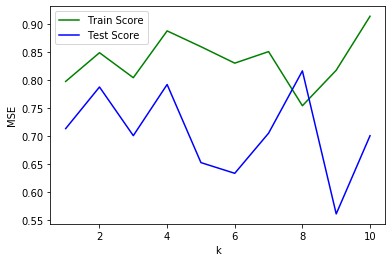

In [495]:
%matplotlib inline
train_score_array = []
test_score_array = []

x_axis = np.array([1,2,3,4,5,6,7,8,9,10])
plt.plot(x_axis, np.array(train_scores).reshape(-1,1), c = 'g', label = 'Train Score')
plt.plot(x_axis, np.array(test_scores).reshape(-1,1), c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

# 6. Polynomial Regression

In [529]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(4), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}
poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=5)
poly_grid.fit(X_train_sc, y_train)

print("Best degree -->",poly_grid.best_params_['polynomialfeatures__degree'])
print("Best score -->",poly_grid.best_score_)


/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (918,33) into shape (918,0)

  FitFailedWarning)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (918,33) into shape (918,0)

  FitFailedWarning)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (918,33) into sha

Best degree --> 1
Best score --> 0.8919258274787794


In [566]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lm.fit(X_train_poly, y_train)
poly_score_train = round((lm.score(X_train_poly, y_train)*100),2)
print(poly_score_train)
poly_score_test = round((lm.score(X_test_poly, y_test)*100),2)
print(poly_score_test)

y_pred_poly_test = poly_grid.predict(X_test)
rmse_poly = np.sqrt(mean_squared_error(y_pred_poly_test, y_test)**2)
print("RMSE POLY  -->",rmse_poly)

95.92
54.27
RMSE POLY  --> 2.9094590074408966e+31


In [531]:
poly_train_score = []
poly_test_score =[]
poly_train_score.append(cross_val_score(poly_grid,X_train,y_train,cv=5))


poly_test_score.append(cross_val_score(poly_grid,X_test,y_test,cv=5))

print("\nMean Train score -->",np.mean(poly_train_score))
print("Mean Test score  -->",np.mean(poly_test_score))


/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (734,33) into shape (734,0)

  FitFailedWarning)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (734,33) into shape (734,0)

  FitFailedWarning)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (734,33) into sha

/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (734,33) into shape (734,0)

  FitFailedWarning)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (734,33) into shape (734,0)

  FitFailedWarning)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (734,33) into sha

/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (734,33) into shape (734,0)

  FitFailedWarning)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (734,33) into shape (734,0)

  FitFailedWarning)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (734,33) into sha

/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (735,33) into shape (735,0)

  FitFailedWarning)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (735,33) into shape (735,0)

  FitFailedWarning)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (735,33) into sha

/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (184,33) into shape (184,0)

  FitFailedWarning)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (184,33) into shape (184,0)

  FitFailedWarning)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (184,33) into sha

/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (184,33) into shape (184,0)

  FitFailedWarning)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (184,33) into shape (184,0)

  FitFailedWarning)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (184,33) into sha

/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (184,33) into shape (184,0)

  FitFailedWarning)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (184,33) into shape (184,0)

  FitFailedWarning)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (184,33) into sha

/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (184,33) into shape (184,0)

  FitFailedWarning)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (185,33) into shape (185,0)

  FitFailedWarning)
/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (185,33) into sha


Mean Train score --> 0.8919078315148656
Mean Test score  --> 0.8022513549534043


# 5. Select the best Model 

In [591]:
from sklearn.metrics import r2_score
models = pd.DataFrame({
                'Models': ['Linear Regression','Ridge Regression','Lasso Regression','Support Vector Machine_Linear','K-Near Neighbors','Polynomial Regression'],
                'Train_Score':[lreg_score_train, ridge_score_train, lasso_score_train, SVR_reg_train_score, knn_reg_train_score, poly_score_train] ,
                'Test_Score': [lreg_score_test, ridge_score_test, lasso_score_test, SVR_reg_test_score, knn_reg_test_score, poly_score_test],
                'RMSE': [rmse_lreg, rmse_ridge, rmse_lasso,rmse_SVR, rmse_knn, rmse_poly ]   
})
                

models.sort_values(by='RMSE', ascending=True)

,Models,Train_Score,Test_Score,RMSE
0,Linear Regression,91.02,85.14,1.849541e+06
3,Support Vector Machine_Linear,90.47,84.25,1.959587e+06
4,K-Near Neighbors,87.45,80.78,2.391082e+06
2,Lasso Regression,90.95,85.07,2.216708e+15
1,Ridge Regression,91.01,85.12,2.288073e+15
5,Polynomial Regression,95.92,54.27,2.909459e+31


## Conclusion

In [594]:
from sklearn.metrics import r2_score
lin_Rsq = r2_score(y_test, pred)
print(lin_Rsq)

0.851350409228317


## Linear Regression has the highest test score accuracy with lowest RMSE value so It is the best model among all the model. 